<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/clusters/03_centroid_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt, floor
import numpy as np

In [2]:
a = np.array([1,2,3,4,5])
np.shape(a)[0]

5

In [3]:
def random(data, number_centroides, random_state=1234):
  np.random.seed(random_state)
  centroides = []
  length = np.shape(data)[0]
  for _ in range(number_centroides):
    r = np.random.randint(0, length-1)
    centroides.append(data[r])
  return np.array(centroides)

In [4]:
def k_plus_plus(data, number_centroides, random_state=1234):
  np.random.seed(random_state)
  centroids = [data[0]]
  for _ in range(1, number_centroides):
    dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in data])
    probs = dist_sq/dist_sq.sum()
    acumulative_probs = probs.cumsum()
    r = np.random.rand()
    for j, p in enumerate(acumulative_probs):
      if r < p:
        i = j
        break
    centroids.append(data[i])
  return np.array(centroids)

In [5]:
def naive_sharding(data, number_centroides):
  def _get_mean(sums, step):
    return sums/step

  n = np.shape(data)[1]
  m = np.shape(data)[0]
  centroides = np.zeros((number_centroides, n))
  composite = np.mat(np.sum(data, axis = 1))
  data = np.append(composite.T, data, axis=1)
  data.sort(axis=0)
  step = floor(m/number_centroides)
  vfunc = np.vectorize(_get_mean)

  for j in range(number_centroides):
      if j == number_centroides-1:
          centroides[j:] = vfunc(np.sum(data[j*step:,1:], axis=0), step)
      else:
          centroides[j:] = vfunc(np.sum(data[j*step:(j+1)*step,1:], axis=0), step)

  return centroides


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [7]:
n_samples = 250
n_features = 2
n_clusters = 4
random_state = 42
max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

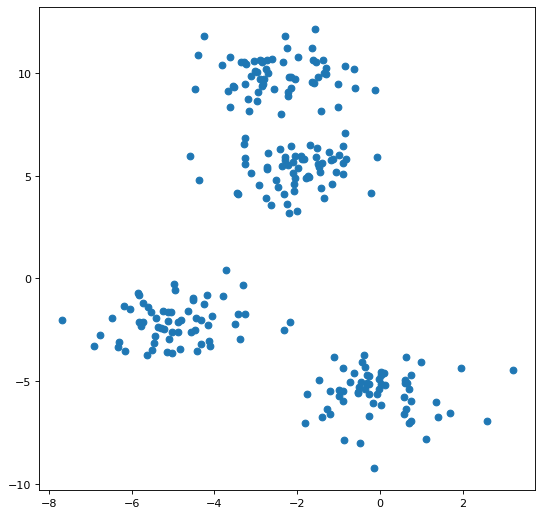

In [8]:
n_samples = 250
n_features = 2
n_clusters = 4
random_state = 50
max_iter = 100
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1]);


**Init random**

In [9]:
random_centroids = random(X, n_clusters)
print(random_centroids)

[[-0.30701678 -5.08790717]
 [-5.13182105 -1.66577757]
 [-3.4551581   4.13339881]
 [-0.27654164 -5.63423684]]


**k-means++**


In [10]:
plus_centroids = k_plus_plus(X, n_clusters)
print(plus_centroids)

[[-2.18946568  3.18853148]
 [-0.88618133 -5.9742995 ]
 [-1.97145426 10.77702065]
 [-4.8806271  -2.14575095]]


**Naive Sharding Initialization**


In [11]:
naive_centroids = naive_sharding(X, n_clusters)
print(naive_centroids)

[[-5.10856991 -5.61315548]
 [-2.90904218 -2.23136812]
 [-1.61047086  5.04878164]
 [ 0.07156839 10.11889012]]


**Visualización de la inicialización del centroide**

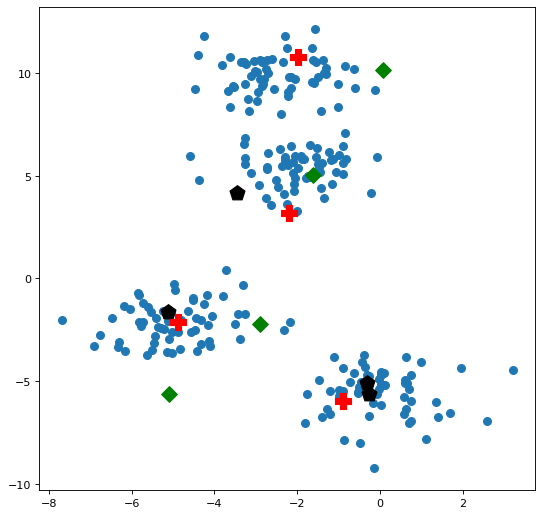

In [18]:
def centroid_plots(X, rand, plus, naive):
    fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
    
    plt.scatter(X[:, 0], X[:, 1],
                s=50,
                marker='o')

    plt.scatter(rand[:, 0], 
                rand[:, 1],
                s=200, c='black',
                marker='p')

    plt.scatter(plus[:, 0],
                plus[:, 1],
                s=200, c='red',
                marker='P')

    plt.scatter(naive[:, 0], 
                naive[:, 1],
                s=100, c='green',
                marker='D');


centroid_plots(X, random_centroids, plus_centroids, naive_centroids)

**Referencia**
---
https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html